In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_56217_R')

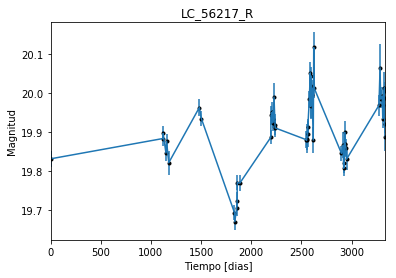

In [3]:
data = np.genfromtxt('LC_56217_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_56217_R')

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

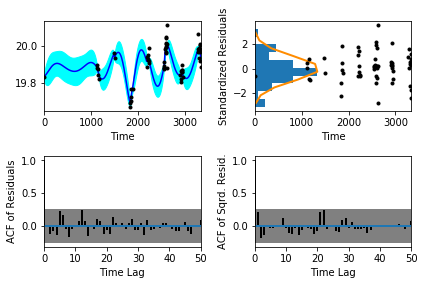

In [6]:
sample.assess_fit()

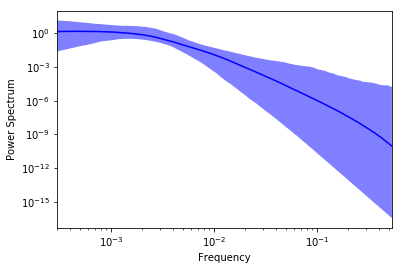

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_56217_R')

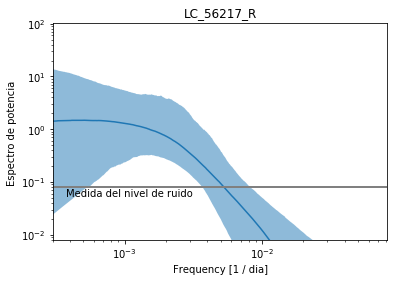

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_56217_R')

Text(0.5,1,'Prediccion , valor esperado LC_56217_R')

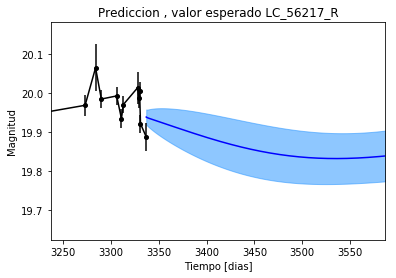

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_56217_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_56217_R')

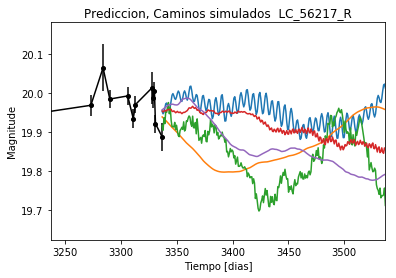

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_56217_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_56217_R')

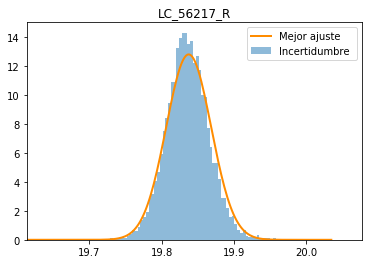

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_56217_R')

Text(0.5,1,'Interpolacion, camino simulado LC_56217_R')

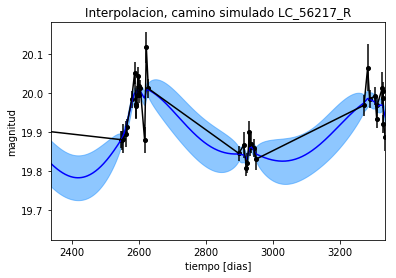

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_56217_R')

Text(0.5,1,'Interpolacion, camino simulado LC_56217_R')

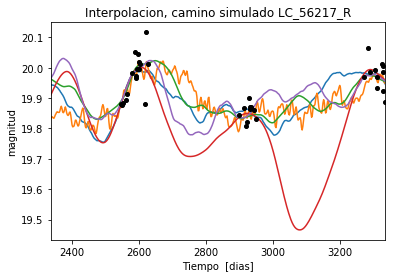

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_56217_R')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1123.09727477
Median: 0.0123441456534
Standard deviation: 0.17933144871
68% credibility interval: [ 0.00101559  0.15850495]
95% credibility interval: [  3.74953264e-04   6.98093869e-01]
99% credibility interval: [  3.11702741e-04   9.71212384e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1040.68522171
Median: 0.00443506469957
Standard deviation: 0.104128400274
68% credibility interval: [ 0.00071561  0.0538582 ]
95% credibility interval: [  3.43932215e-04   3.47074766e-01]
99% credibility interval: [  3.05072526e-04   7.22173967e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 716.508902687
Median: 0.011480711291
St

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1775.92036123
Median: 124.214576583
Standard deviation: 1.72532529919
68% credibility interval: [ 122.28699788  125.45064208]
95% credibility interval: [ 119.73355664  126.40429558]
99% credibility interval: [ 117.7264566   127.14465859]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 467.049255554
Median: 0.610874007582
Standard deviation: 2.24717763211
68% credibility interval: [ 0.0720566   3.74369319]
95% credibility interval: [ 0.0188851   7.54563465]
99% credibility interval: [  0.01289392  11.15116946]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 377.248452051
Median: 0.754329913594
Standard deviation: 11.2444068639
68% credibility interval: [  0.03059615  13.20371096]
95% credibility interval: [  1.7993584

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2357.14675476
Median: 1.7034980685e-28
Standard deviation: 1.41592417161e+68
68% credibility interval: [  9.72439608e-91   2.01520410e+08]
95% credibility interval: [  6.25929642e-175   2.14193435e+056]
99% credibility interval: [  2.52222938e-191   1.52770657e+068]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2073.81497721
Median: 19.8791811566
Standard deviation: 0.0389987797295
68% credibility interval: [ 19.84655192  19.9106338 ]
95% credibility interval: [ 19.79776986  19.95595847]
99% credibility interval: [ 19.74190649  20.00753179]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 617.135483228
Median: 0.0536895552462
Standard deviation: 0.277550891267
68% credibility interval: [ 0.          0.49806218]
95% credibility interval: [ 0.          0.94993739]
99% credibility interval: [ 0.          1.03495578]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 617.135483228
Median: 0.0536895552462
Standard deviation: 0.277550891267
68% credibility interval: [ 0.          0.49806218]
95% credibility interval: [ 0.          0.94993739]
99% credibility interval: [ 0.          1.03495578]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 237.175607463
Median: 0.0
Standard deviation: 0.00108487194709
68% cre

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1775.92036123
Median: 124.214576583
Standard deviation: 1.72532529919
68% credibility interval: [ 122.28699788  125.45064208]
95% credibility interval: [ 119.73355664  126.40429558]
99% credibility interval: [ 117.7264566   127.14465859]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1625.16726186
Median: 0.00867425698404
Standard deviation: 0.0084990804693
68% credibility interval: [ 0.00536285  0.01582882]
95% credibility interval: [ 0.00361973  0.03175212]
99% credibility interval: [ 0.00289898  0.05431858]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 3920.79069745
Median: 1.33678058862
Standard deviation: 0.218364201113
68% credibility interval: [ 1.12945501  1.57005882]
95% credibility interval: [ 0.94978456  1.81120685]
99% credibility interval: [ 0.83841748  1.93792924]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 886.705999163
Median: 0.000190812649165
Standard deviation: 0.200822978064
68% credibility interval: [  6.76678487e-12   1.06718749e-02]
95% credibility interval: [  8.60972365e-59   4.07727617e-01]
99% credibility interval: [  2.91717108e-70   1.28459252e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1123.09727477
Median: (-0.077560554599-0.213234784828j)
Standard deviation: 2.07625066475
68% credibility interval: [-0.99591597-4.93448076j -0.00638115-0.27393779j]
95% credibility interval: [ -4.38625314e+00+0.j         -2.35590084e-03-0.0041281j]
99% credibility interval: [ -6.10230738e+00+0.j          -1.95848608e-03-4.60891535j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1040.68522171
Median: (-0.0278663333567+1.60846330375j)
Standard deviation: 1.86259325351
68% credibility interval: [-0.33840106+0.60780509j -0.00449630+0.0150006j ]
95% credibility interval: [ -2.18073507e+00+1.88849923j  -2.16098984e-03+0.07831637j]
99% credibility interval: [ -4.53755286e+00+5.86852336j  -1.91682722e-03+0.00984378j]
Poster